NOTE - NOT YET COMPLETED

# Install Data & Packages

In [1]:
pip install statsmodels --quiet

Import necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler
import os
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from numpy.linalg import inv, eig
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
try:
    import statsmodels.api.add_constant
except ImportError:
    pass

Import Data.

In [3]:
path_data = '/content/data.csv' #edit path as necessary

# Check if files exist before loading
if os.path.exists(path_data):
    data = pd.read_csv(path_data)
    print("Data loaded successfully.")
else:
    print("Error: One or both files not found. Check the file paths.")

Data loaded successfully.


In [4]:
data

,ViolentCrimesPerPop,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,OtherPerCap
0,0.20,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.36
1,0.67,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.22
2,0.43,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.28
3,0.12,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.36
4,0.03,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.09,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.36
1990,0.45,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.23
1991,0.23,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.22
1992,0.19,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.27


In [5]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

# Least Squares

In [6]:
p = X.shape[1]
n = X.shape[0]
print(f'The number of observations: {n}.\nThe number of predictors: {p}.\nSince n > p, we can expect LS to yield a unique solution.')

The number of observations: 1994.
The number of predictors: 100.
Since n > p, we can expect LS to yield a unique solution.


In [7]:
if 'constants' not in X.columns:
  const = pd.DataFrame([1]*X.shape[0]).rename(columns = {0: 'constants'})
  X = pd.concat([const, X], axis = 1)
X

,constants,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,OtherPerCap
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.36
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.22
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.28
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.36
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.36
1990,1,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.23
1991,1,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.22
1992,1,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.27


In [8]:
#Least squares using statsmodels
lsmodel = OLS(y,X).fit()
summary = lsmodel.summary()

#Access the coefficients and p-values
coefficients = lsmodel.params
p_values = lsmodel.pvalues

In [9]:
alpha_values = [0.10, 0.05, 0.01, 0.001]
filtered_results_dict = {alpha:[] for alpha in alpha_values}
for alpha in alpha_values:
  results = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})
  results.index = X.columns
  results = results.sort_values(by = 'Coefficient', key = abs, ascending = False) #sort by coeff to determine which coeffs have greatest impact
  results_filtered = results.loc[results['P-Value'] <= alpha] #filter significant coeff by p-value using alpha
  filtered_results_dict[alpha] = results_filtered

In [10]:
for alpha in alpha_values:
  print(f'LS yields {filtered_results_dict[alpha].shape[0]} significant coefficients using alpha = {alpha}')

LS yields 36 significant coefficients using alpha = 0.1
LS yields 28 significant coefficients using alpha = 0.05
LS yields 15 significant coefficients using alpha = 0.01
LS yields 6 significant coefficients using alpha = 0.001


In [11]:
level = 0.05 #take alpha = 5%
significant_coefficients_LS = list(filtered_results_dict[level].index)
filtered_results_dict[level]
#note that the p-value of 0.005 for constants implies that we the intercept is statistically significant (Beta0 = 0.566 != 0).

,Coefficient,P-Value
PersPerOccupHous,0.637574,0.010826
constants,0.566083,0.005393
MedRent,0.370840,0.004287
whitePerCap,-0.354210,0.020414
PctKids2Par,-0.325910,0.036017
PersPerRentOccHous,-0.257846,0.001465
PctEmploy,0.248278,0.001697
RentLowQ,-0.237365,0.000415
MalePctNevMarr,0.230541,0.000712
PctPersDenseHous,0.217437,0.004113


In [14]:
X_filtered = X[significant_coefficients_LS]
X_filtered

,PersPerOccupHous,constants,MedRent,whitePerCap,PctKids2Par,PersPerRentOccHous,PctEmploy,RentLowQ,MalePctNevMarr,PctPersDenseHous,...,NumInShelters,PctIlleg,pctWRetire,MedOwnCostPctIncNoMtg,PctVacMore6Mos,PctEmplManu,PctVacantBoarded,pctWFarmSelf,pctUrban,OtherPerCap
0,0.33,1,0.34,0.39,0.59,0.28,0.68,0.36,0.40,0.09,...,0.04,0.14,0.43,0.25,0.26,0.23,0.05,0.34,1.0,0.36
1,0.17,1,0.37,0.38,0.47,0.17,0.73,0.42,0.63,0.20,...,0.00,0.24,0.39,0.18,0.25,0.57,0.02,0.11,1.0,0.22
2,0.46,1,0.31,0.29,0.44,0.43,0.58,0.27,0.41,0.15,...,0.00,0.46,0.84,0.28,0.30,0.32,0.29,0.19,0.0,0.28
3,0.85,1,0.89,0.40,0.54,1.00,0.71,0.75,0.45,0.12,...,0.00,0.33,0.82,0.47,0.47,0.36,0.60,0.21,1.0,0.36
4,0.59,1,0.38,0.41,0.91,0.37,0.65,0.40,0.27,0.02,...,0.00,0.06,0.71,0.21,0.55,0.67,0.04,0.16,0.9,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.41,1,0.41,0.50,0.68,0.40,0.71,0.45,0.41,0.10,...,0.00,0.11,0.46,0.39,0.21,0.17,0.00,0.14,1.0,0.36
1990,0.74,1,0.54,0.20,0.63,0.87,0.77,0.54,0.75,0.67,...,0.01,0.42,0.48,0.31,0.13,0.10,0.17,0.10,1.0,0.23
1991,0.39,1,0.37,0.34,0.42,0.37,0.46,0.28,0.53,0.15,...,0.06,0.54,0.57,0.53,0.45,0.63,0.53,0.17,1.0,0.22
1992,0.36,1,0.64,0.40,0.65,0.26,0.57,0.58,0.87,0.13,...,0.04,0.17,0.45,0.40,0.34,0.44,0.17,0.21,1.0,0.27


# Best Subsets

## Filtering

In [17]:
print(f'There are {X.shape[1] - 1} explanatory variables in X.  \nTherefore, running Best Subsets is not feasible as this is an NP-hard problem requiring searching through all possible combinations.')

There are 100 explanatory variables in X.  
Therefore, running Best Subsets is not feasible as this is an NP-hard problem requiring searching through all possible combinations.


To filter variables using p-values before performing best subsets selection, start by fitting a least squares (LS) model for each individual variable against the target. From each model, extract the p-value associated with the variable's coefficient. Set a significance threshold, typically 0.05, and exclude variables with p-values above this threshold, as they are less likely to have a meaningful relationship with the target. This process reduces the number of variables, making the subsequent best subsets selection more computationally efficient. Only the significant variables are retained for further modeling.

In [18]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

In [19]:
const = pd.DataFrame([1]*X.shape[0]).rename(columns = {0: 'constants'})

dataframes_Xi = []
for i in range(X.shape[1]):
  dataframes_Xi.append(pd.concat([const, X.iloc[:,i]], axis = 1))

In [20]:
pvals_dict = {'Variable': [], 'Coefficient': [], 'P-Value': []}

In [21]:
for index, var in enumerate(X.columns):
  lsmodel = OLS(y,dataframes_Xi[index]).fit()
  coefficients = lsmodel.params
  p_values = lsmodel.pvalues
  pvals_dict['Variable'].append(var)
  pvals_dict['P-Value'].append(p_values[1:].values[0])
  pvals_dict['Coefficient'].append(coefficients[1:].values[0])

In [22]:
df_bestsubs = pd.DataFrame(pvals_dict)
df_bestsubs

,Variable,Coefficient,P-Value
0,population,0.674060,1.126618e-64
1,householdsize,-0.049698,1.190108e-01
2,racepctblack,0.580310,3.757220e-222
3,racePctWhite,-0.653751,4.835180e-276
4,racePctAsian,0.041964,9.305212e-02
...,...,...,...
95,LandArea,0.418891,7.360161e-19
96,PopDens,0.322807,1.313566e-37
97,PctUsePubTrans,0.156468,4.987116e-12
98,LemasPctOfficDrugUn,0.337975,4.518010e-58


In [23]:
df_bestsubs.loc[df_bestsubs['P-Value'] <= 0.05]

,Variable,Coefficient,P-Value
0,population,0.674060,1.126618e-64
2,racepctblack,0.580310,3.757220e-222
3,racePctWhite,-0.653751,4.835180e-276
5,racePctHisp,0.293672,8.769028e-41
6,agePct12t21,0.090790,6.905984e-03
...,...,...,...
95,LandArea,0.418891,7.360161e-19
96,PopDens,0.322807,1.313566e-37
97,PctUsePubTrans,0.156468,4.987116e-12
98,LemasPctOfficDrugUn,0.337975,4.518010e-58


This method yielded poor results.  We have only disregarded 6 variables by filtering on the p-values.  Now we must try another filtering method.

In [26]:
updating_filtered_vars = df_bestsubs.loc[df_bestsubs['P-Value'] <= 0.05]['Variable'].values
updating_filtered_vars

array(['population', 'racepctblack', 'racePctWhite', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
       'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWel

Now we will try eliminating variables based on multicollinearity.  This is done by checking for highly correlated variables. Using techniques like VIF (Variance Inflation Factor) can help to identify variables that are highly correlated and may cause multicollinearity by quanitifying how much the variance of a regression coefficient is inflated due to collinearity with other predictors.  

*   VIF for Each Variable: It calculates how much the variance of the estimated regression coefficients is increased due to multicollinearity.
*   High VIF: If a variable has a high VIF (typically greater than 5 to 10), it indicates that the variable is highly correlated with other variables in the model and may need to be removed.


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, updating_filtered_vars] #using already filtered vars from above

# Add a constant to X
X = pd.concat([const, X], axis = 1)

# Compute VIF for each variable
vif_dict = {'Variable': X.columns, 'VIF':[]}

for i in range(X.shape[1]):
  vif_dict['VIF'].append(variance_inflation_factor(X.values, i))

vif_df = pd.DataFrame(vif_dict)
vif_df

,Variable,VIF
0,constants,4333.208550
1,population,289.783005
2,racepctblack,17.245356
3,racePctWhite,20.000628
4,racePctHisp,14.856303
...,...,...
90,LandArea,3.291710
91,PopDens,4.292050
92,PctUsePubTrans,3.197351
93,LemasPctOfficDrugUn,1.575041


In [29]:
vif_level = 5 #The literature suggests that greater then 5 to 10 is high
var_filtered_vif = (vif_df.loc[vif_df['VIF'] <= vif_level].reset_index(drop=True))['Variable'].values
print(f'We have now filtered the variables to the {len(var_filtered_vif)} variables printed below.  However, this is still to many variables to perform best subsets.  We now will try another method to further filter the variables.\n')
var_filtered_vif

We have now filtered the variables to the 24 variables printed below.  However, this is still to many variables to perform best subsets.  We now will try another method to further filter the variables.



array(['pctWFarmSelf', 'pctWRetire', 'blackPerCap', 'indianPerCap',
       'AsianPerCap', 'HispPerCap', 'PctEmplManu', 'PctWorkMom',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet',
       'PctBornSameState', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'OtherPerCap'], dtype=object)

After filtering features based on p-values and addressing multicollinearity using VIF, now we can check the correlation between (x_i,y).  Where a high VIF was bad as it demonstrated multicollinearity, a low correlation between (x_i,y) is not desirable.  Therefore, we will drop the variables where the correlation between that variable and y is below some desired level (e.g. 0.15).

In [99]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, var_filtered_vif] #using already filtered vars from above

corr_df = X.corrwith(y).to_frame(name='Corr(x_i, y)')
corr_df['Absolute Correlation'] = corr_df.apply(lambda x: abs(x))
corr_df = corr_df.sort_values(by = 'Absolute Correlation', ascending = False)
corr_df

,"Corr(x_i, y)",Absolute Correlation
PctVacantBoarded,0.482816,0.482816
NumInShelters,0.375754,0.375754
PctWOFullPlumb,0.364454,0.364454
MedNumBR,-0.357385,0.357385
LemasPctOfficDrugUn,0.348627,0.348627
NumStreet,0.340277,0.340277
MedRentPctHousInc,0.325045,0.325045
PctHousOccup,-0.319010,0.319010
PopDens,0.281390,0.281390
blackPerCap,-0.275391,0.275391


In [108]:
correlation_level = 0.15
# Find features with correlation lower than {correlation_level}
low_corr_variables = list(corr_df.loc[corr_df['Absolute Correlation'] <= correlation_level].index)
high_corr_Xandy = list(corr_df.loc[corr_df['Absolute Correlation'] > correlation_level].index)
print(f"There were {len(low_corr_variables)} features removed due to low correlation between that variable and y.")

There were 8 features removed due to low correlation between that variable and y.


Therefore, the finalized set of variables that we are going to perform best subsets on is below.

In [111]:
print(f'We can now perform best subsets as the number of variables has been reduced to {len(high_corr_Xandy)}\n')

high_corr_Xandy

We can now perform best subsets as the number of variables has been reduced to 16



['PctVacantBoarded',
 'NumInShelters',
 'PctWOFullPlumb',
 'MedNumBR',
 'LemasPctOfficDrugUn',
 'NumStreet',
 'MedRentPctHousInc',
 'PctHousOccup',
 'PopDens',
 'blackPerCap',
 'HispPerCap',
 'LandArea',
 'AsianPerCap',
 'PctUsePubTrans',
 'pctWFarmSelf',
 'PctWorkMom']

In [112]:
X_filtered = X[high_corr_Xandy]
X_filtered

,PctVacantBoarded,NumInShelters,PctWOFullPlumb,MedNumBR,LemasPctOfficDrugUn,NumStreet,MedRentPctHousInc,PctHousOccup,PopDens,blackPerCap,HispPerCap,LandArea,AsianPerCap,PctUsePubTrans,pctWFarmSelf,PctWorkMom
0,0.05,0.04,0.06,0.5,0.32,0.00,0.38,0.71,0.26,0.32,0.41,0.12,0.27,0.20,0.34,0.76
1,0.02,0.00,0.00,0.0,0.00,0.00,0.29,0.79,0.12,0.33,0.35,0.02,0.30,0.45,0.11,0.53
2,0.29,0.00,0.45,0.5,0.00,0.00,0.48,0.86,0.21,0.27,0.39,0.01,0.29,0.02,0.19,0.67
3,0.60,0.00,0.11,0.5,0.00,0.00,0.63,0.97,0.39,0.39,0.44,0.02,0.25,0.28,0.21,0.86
4,0.04,0.00,0.14,0.5,0.00,0.00,0.22,0.89,0.09,0.28,0.48,0.04,0.74,0.02,0.16,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.09,0.5,0.00,0.00,0.50,0.75,0.28,0.27,0.52,0.01,0.16,0.05,0.14,0.73
1990,0.17,0.01,0.37,0.0,0.00,0.00,0.69,0.80,0.37,0.26,0.26,0.02,0.20,0.20,0.10,0.40
1991,0.53,0.06,0.29,0.0,0.91,0.02,0.52,0.65,0.32,0.25,0.28,0.08,0.28,0.18,0.17,0.46
1992,0.17,0.04,0.34,0.0,0.22,0.01,0.43,0.84,0.38,0.29,0.37,0.03,0.31,0.33,0.21,0.63


## Running Best Subsets

Now to run best subsets on the variables that we have filtered.

In [113]:
import time
start_time = time.time()

colnames = X_filtered.columns
# Define a linear regression model
linear_reg = LinearRegression()
#Obtain exhaustive mse values
efs = EFS(
      linear_reg,
      min_features=1,
      max_features=8,
      scoring="neg_mean_squared_error", #we use negative mse since the sfs method maximizes the score
      cv=0
)
efs.fit(X_filtered, y)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.4f} seconds")

#Took 204 seconds on colab cpu (High-RAM)

Features: 39202/39202

Execution time: 203.9806 seconds


In [116]:
#Obtain a summary of the exhaustive results (all possible models)
efs_summary = pd.DataFrame.from_dict(efs.get_metric_dict()).T[["feature_idx", "avg_score"]]
efs_summary["feature_idx"]
efs_size = np.zeros(len(efs_summary))
for i in range(len(efs_summary)):
    efs_size[i] = len(efs_summary["feature_idx"][i])
efs_summary['model size'] = efs_size
efs_summary.rename(columns={'avg_score': 'neg_mse'}, inplace=True)
# print("The first few results for exhaustive feature selection (all possible models) look like:")
# print(efs_summary.iloc[range(15)].to_string(index=False))

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [120]:
# #code to calculate model evaluation criteria for all models in efs_summary
# Y = y
# #code to calculate sigma hat squared for Mallows Cp calculation
# X_with_const = sm.tools.tools.add_constant(X)
# model = sm.regression.linear_model.OLS(Y, X_with_const).fit()
# sigma_hat_squared = np.sum(model.resid ** 2) / (len(Y) - len(X[0])) #intercept not counted as predictor
# #code to calculate total sum of squares, used for r2 calculation:
# Y_mean = np.mean(Y)
# tss = sum((Y - np.full(len(Y), Y_mean))**2)

# prederror = np.zeros((len(efs_summary),4))
# for i in range(len(efs_summary)):
#     rss = -efs_summary.iloc[i,1]*len(X)
#     p = efs_summary.iloc[i,2]
#     n = len(X)
#     aic = 2*p + n * np.log(rss/n)
#     bic = p * np.log(n) + n * np.log(rss/n)
#     mallows_cp = (rss / sigma_hat_squared) - n + 2 * p
#     r2 = 1 - rss/tss
#     adjr2 = 1 - (1 - r2)*(n-1)/(n-p-1)
#     prederror[i,0] = bic
#     prederror[i,1] = adjr2
#     prederror[i,2] = mallows_cp
#     prederror[i,3] = aic

# efs_summary['bic'] = prederror[:,0]
# efs_summary['adjr2'] = prederror[:,1]
# efs_summary['cp'] = prederror[:,2]
# efs_summary['aic'] = prederror[:,3]
# print(efs_summary.iloc[0:15,:].to_string(index=False))

# print("The best model for each criterion is:")
# print("BIC: " + str(np.array(colnames)[np.array(best_model_display['BIC'][0])]))
# print("Adj R2: " + str(np.array(colnames)[np.array(best_model_display['Adj R2'][0])]))
# print("Cp: " + str(np.array(colnames)[np.array(best_model_display['CP'][0])]))

# Step-Wise Approach



In [41]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

colnames = X.columns

#Loading data
Y = y.to_numpy()
X = X.to_numpy()

# Center data
Y_centered = Y - np.mean(Y)
X_centered = X - np.mean(X, axis=0)

# Standardize X (centered and scaled)
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

#Feature names
colnames

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'PctRec

In [42]:
#defining aic evaluation functions compatible with mlxtend.feature_selection.SequentialFeatureSelector
def calculate_aic(estimator, X, y):
    """
    Custom AIC scorer for SequentialFeatureSelector.
    Args:
        estimator: A fitted sklearn-compatible estimator.
        X: Features (numpy array).
        y: Target variable (numpy array).
    Returns:
        Negative AIC value for compatibility with SFS (higher is better).
    """
    n, k = X.shape  # n: number of samples, k: number of predictors
    y_pred = estimator.predict(X)
    residual_sum_of_squares = np.sum((y - y_pred) ** 2)
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k
    return -aic  # SFS maximizes the score

def aic_scorer_wrapper(estimator, X, y):
    estimator.fit(X, y)
    return calculate_aic(estimator, X, y)

In [43]:
import time
start_time = time.time()

model = LinearRegression()
sfs_forward = SFS(
    model,
    k_features='best',
    forward=True,
    floating=False,
    scoring=aic_scorer_wrapper,  # Use custom AIC scorer
    cv=0  # No cross-validation, evaluate on the whole dataset
)

sfs_forward.fit(X_standardized,Y_centered)

print("Selected features:", np.array(colnames)[np.array(sfs_forward.k_feature_names_, dtype=int)])
print(pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T[["feature_idx", "avg_score"]])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.4f} seconds")


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

The above code utilizes Stepwise Forward Selection (SFS) to identify the most relevant features for a Linear Regression model based on Akaike Information Criterion (AIC) scoring. The algorithm begins with an empty model and iteratively adds the feature that minimizes AIC at each step, continuing until no further improvement is observed. Given the dataset size of 100 features and 2000 observations, this approach results in a computationally expensive process. On a MacBook Pro M4 CPU, the execution took approximately 8 minutes, highlighting inefficiency for large-scale feature selection. To improve performance, an alternative approach such as Recursive Feature Elimination (RFE) could be utilized, which systematically removes the least important features and reduces computational complexity. Additionally, leveraging a GPU (e.g., NVIDIA A100) for parallelized model fitting could significantly accelerate the process, making it more suitable for large datasets.

In [47]:
print("Selected features:\n")

np.array(colnames)[np.array(sfs_forward.k_feature_names_, dtype=int)]

Selected features:



array(['racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29',
       'agePct16t24', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc',
       'whitePerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
       'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
       'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR',
       'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'PctVacMore6Mos', 'RentLowQ', 'RentHighQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
       'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'Othe

# LASSO.

Lasso (Least Absolute Shrinkage and Selection Operator) regression utilizes L1 regularization, which adds a penalty proportional to the absolute values of the model's coefficients. This penalty encourages sparsity, effectively shrinking less important feature coefficients towards zero. As a result, Lasso performs feature selection by setting the coefficients of insignificant features to exactly zero, thus removing them from the model. This leads to a simpler, more interpretable model, especially useful in high-dimensional datasets where only a subset of features are expected to be relevant. Unlike Ridge regression, which only shrinks coefficients without eliminating them, Lasso's ability to produce sparse models makes it a powerful tool for both regularization and feature selection.

In [44]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

colnames = X.columns

#Loading data
Y = y.to_numpy()
X = X.to_numpy()

# Center data
Y_centered = Y - np.mean(Y)
X_centered = X - np.mean(X, axis=0)

# Standardize X (centered and scaled)
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

Methods to tune hyperparameter include K-Fold Cross-Validation, Bayesian Information Criterion (BIC), Regularization Path (Pathwise Coordinate Descent), etc.  However, for now we are using LASSO for feature selection and are not really searching for an optimal model yet.  Therefore, we will pick a penalty value at our discretion using the following guidelines.
*   If you are seeing a large number of variables (e.g., 50 out of 100) still retained in the model, it might indicate that the alpha value is too small (not applying enough regularization).
*   If only a small fraction of variables remain non-zero (e.g., 5-10 variables out of 100), this could indicate that the alpha value is too large, possibly over-penalizing the model.

In [52]:
# Fit OLS
fit0 = LinearRegression()
fit0.fit(X_standardized, Y_centered)

# Fit LASSO
l1_penalty = .1 #alpha = 1.0 is default penalty, so it must be specified
lasso = Lasso(alpha = l1_penalty , fit_intercept=False)
lasso.fit(X_standardized, Y_centered)

# Ensure all arrays have the same shape
colnames = np.array(colnames)  # Convert to NumPy array
ols_coefs = fit0.coef_.flatten()  # Ensure it's 1D
lasso_coefs = lasso.coef_.flatten()  # Ensure it's 1D

# Stack into a DataFrame
lasso_df = pd.DataFrame({
    "Variables": colnames,
    "Without L1": ols_coefs,
    "With L1": lasso_coefs
})
lasso_df

,Variables,Without L1,With L1
0,population,0.019962,0.000000
1,householdsize,-0.003679,-0.000000
2,racepctblack,0.051409,0.000000
3,racePctWhite,-0.012111,-0.004597
4,racePctAsian,-0.003259,0.000000
...,...,...,...
95,LandArea,0.002680,0.000000
96,PopDens,-0.002498,0.000000
97,PctUsePubTrans,-0.009556,0.000000
98,LemasPctOfficDrugUn,0.006180,0.000000


In [53]:
lasso_df['With L1'].unique()

array([ 0.        , -0.00459732, -0.03884439,  0.03439357])

In [114]:
lasso_df.loc[abs(lasso_df['With L1']) != 0.0]

,Variables,Without L1,With L1


##Regularization Path

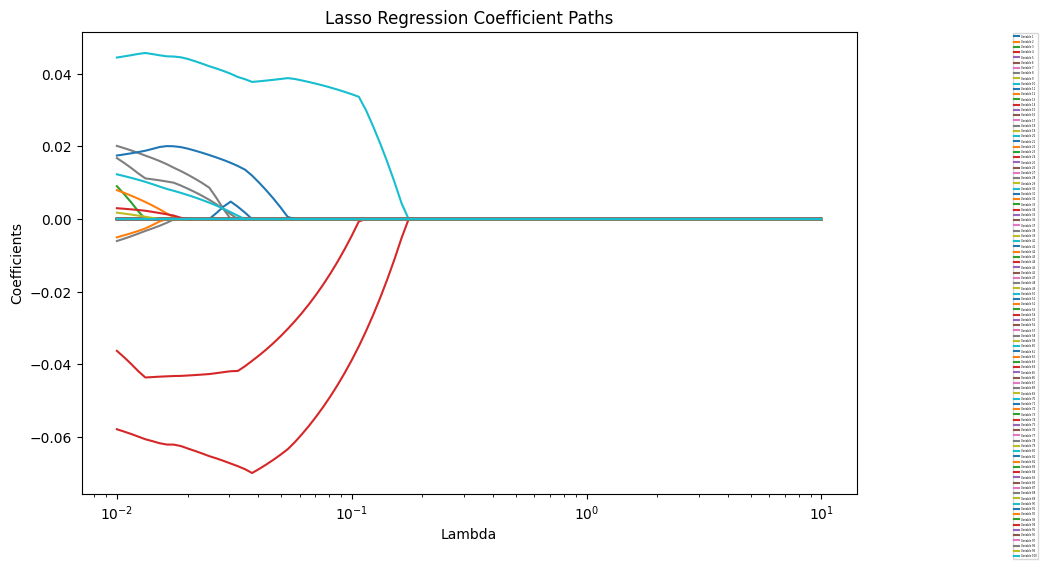

In [84]:
lambdas = np.exp(np.linspace(np.log(0.01), np.log(10), 100))
betasl = np.zeros((len(lambdas), X.shape[1]))
for i, lamb in enumerate(lambdas):
    lasso = Lasso(alpha = lamb)
    lasso.fit(X_standardized, Y_centered)
    betasl[i, :] = lasso.coef_

# Plot Lasso paths (log-scale)
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]): #for each variable
    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")
plt.legend(fontsize=1.8, loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()